The Sparks Foundation

## Task 1: Prediction Using Supervised Machine Learning

To Predict the Percentage of Marks of the students based on the Number of hours they studied

Project by: RICHA PURI

Importing all the Required Libraries 

In [52]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Reading the Data

In [39]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [40]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Understanding the Data

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in the Dataset so, we can now visualize our Data.

Data Visualization

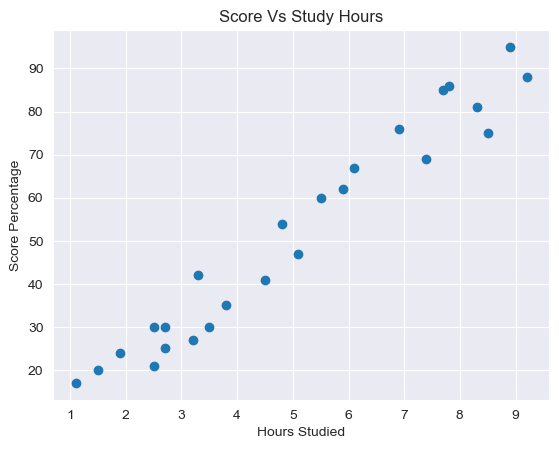

In [42]:
plt.scatter(y= data['Scores'], x= data['Hours'])
plt.title('Score Vs Study Hours')
plt.ylabel('Score Percentage')
plt.xlabel('Hours Studied')
plt.show()

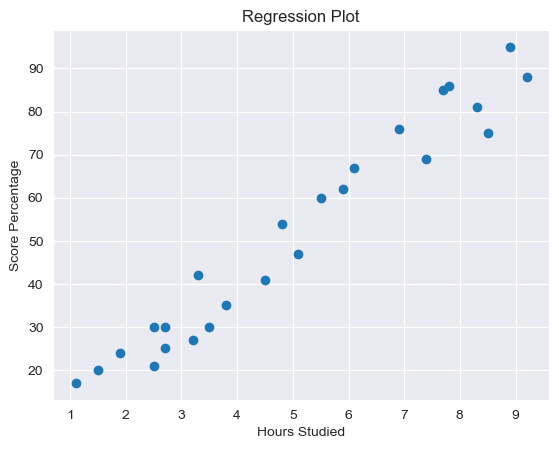

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [46]:
plt.scatter(y= data['Scores'], x= data['Hours'])
plt.title('Regression Plot')
plt.ylabel('Score Percentage')
plt.xlabel('Hours Studied')
plt.show()
plt.show()
print(data.corr())

The variables are positively corelated.

Data Preparation: Training the Model

1. Slicing the Data

In [47]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(18, 1)
(18,)
(7, 1)
(7,)


2. Fitting the Data into the Linear Regression Model

In [50]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [54]:
model.coef_

array([9.94167834])

In [56]:
model.intercept_

1.932204253151646

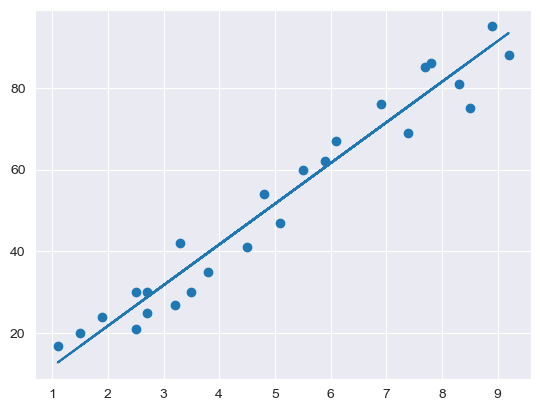

In [60]:
# Plotting the regression line
regressor = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regressor);
plt.show()

The Model is now Trained

3. Predicting the Percentage of Marks(Test Data)

In [62]:
pred_y = model.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks

In [63]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing the Predicted Marks with the Actual Marks

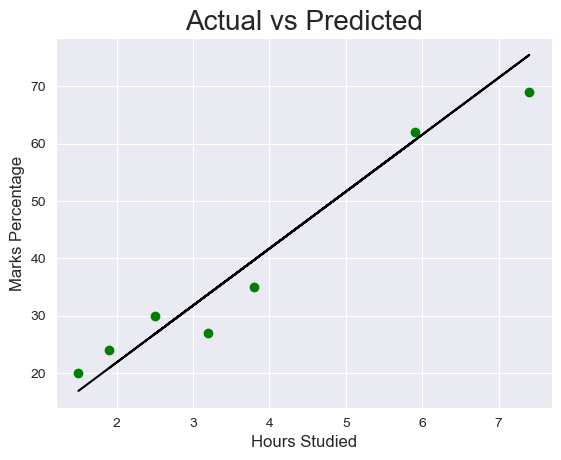

In [65]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Evaluating the Model

In [66]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


A Smaller Mean Absolute Error(MAE) suggests that the model is making predictions that are, on average, more accurate.

Q: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [68]:
hours = [9.25]
answer = model.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
